In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as sklearn_datasets

In [14]:
SEED = 0

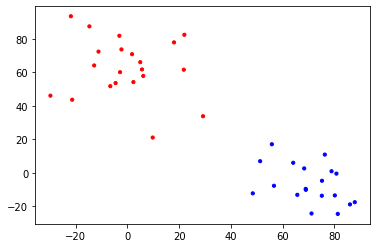

In [25]:
n = 40
data = sklearn_datasets.make_biclusters(shape=(n, 2), n_clusters=2, noise=15.0, random_state=SEED)
X = data[0]
y = data[1][0].astype(int)
colors = ["r" if y_ == 1 else "b" for y_ in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=10)

### Support Vector Machine (separable case)

Suppose a set of two-class samples $(\mathbf{x}_{i}, y_{i})$, $y_{i} \in \pm1$, $i = 1, \dots, N$ are separable with a hyperplane; $f(x) = \mathbf{w}^{T}\mathbf{x} + w_{0}$.

\begin{eqnarray}
y_{i} = 1 \qquad \rightarrow \qquad \mathbf{w}^{T}\mathbf{x}_{i} + w_{0} & \ge & 1\\
y_{i} = -1 \qquad \rightarrow \qquad \mathbf{w}^{T}\mathbf{x}_{i} + w_{0} & \le & -1
\end{eqnarray}

The two inequalities can be expressed in a single line,

\begin{eqnarray}
y_{i} (\mathbf{w}^{T}\mathbf{x}_{i} + w_{0}) & \ge & 1
\end{eqnarray}

We want to maximize the inter-class margin $r(\mathbf{w}, w_{0})$, which is the minimum difference of the projection of $\mathbf{x}_{i}$'s onto $\mathbf{w}/|\mathbf{w}|$ between the two classes.

\begin{eqnarray}
r(\mathbf{w}, w_{0}) & = & min_{x_{i} \in C_{y_{i} = 1}} \frac{\mathbf{w}^{T}\mathbf{x}_{i} + w_{0}}{|\mathbf{w}|} - 
max_{x_{i} \in C_{y_{i} = -1}} \frac{\mathbf{w}^{T}\mathbf{x}_{i} + w_{0}}{|\mathbf{w}|} \\
& = & \frac{1}{|\mathbf{w}|} - \frac{-1}{|\mathbf{w}|}\\
& = & \frac{2}{|\mathbf{w}|}
\end{eqnarray}

In order to maximize $r(\mathbf{w}, w_{0})$, one has to minimize $|\mathbf{w}|$. Hence the optimization problem $L(\mathbf{w})$ can be expressed as below.

\begin{eqnarray}
L(\mathbf{w}) & = & \frac{1}{2}\mathbf{w}^{T}\mathbf{w}\\
min_{\mathbf{w}} L(\mathbf{w}) \quad& subject\ to & \quad y_{i} (\mathbf{w}^{T}\mathbf{x}_{i} + w_{0}) \ge 1
\end{eqnarray}

The primal problem of this constrained optimization is to find $(\mathbf{w}, \mathbf{\alpha})$ that minimizes $L(\mathbf{w}, \mathbf{\alpha})$.

\begin{eqnarray}
L(\mathbf{w}, \mathbf{\alpha}) & = & \frac{1}{2}\mathbf{w}^{T}\mathbf{w} - \sum_{i = 1}^{N} \alpha_{i} \big( y_{i} (\mathbf{w}^{T}\mathbf{x}_{i} + w_{0}) - 1\big),
\end{eqnarray}

where $\alpha_{i}$ is a Lagrange multiplier. 

The solution of this problem satisfies KKT condition:

\begin{eqnarray}
\nabla_{\mathbf{w}} L(\mathbf{w}, \mathbf{\alpha}) \bigg|_{\mathbf{w}=\mathbf{w}'}
& = & \mathbf{w}' - \sum_{i = 1}^{N} \alpha_{i} y_{i} \mathbf{x}_{i} = 0\\
\nabla_{\mathbf{w}} L(\mathbf{w}, \mathbf{\alpha}) \bigg|_{w_{0}=w'_{0}}
& = & \sum_{i = 1}^{N} \alpha_{i} y_{i} = 0\\
\alpha_{i} & \ge & 0\\
\alpha_{i} \big( y_{i}(\mathbf{w}^{T} \mathbf{x}_{i} + w_{0}) - 1\big) & = & 0
\end{eqnarray}

The last condidtion is called complementary condition yielding:
- if $y_i \big((\mathbf{w}^{T} \mathbf{x}_{i} + w_{0}) - 1\big) > 0 \rightarrow \alpha_{i} = 0$
- if $y_i \big((\mathbf{w}^{T} \mathbf{x}_{i} + w_{0}) - 1\big) = 0 \rightarrow \alpha_{i} \ge 0 \qquad$ : support  vector


The optimal solution for $\mathbf{w}$ is
\begin{eqnarray}
\mathbf{w} & = & \sum_{i = 1}^{N} \alpha_{i} y_{i} \mathbf{x}_{i}
\end{eqnarray}

$L(\mathbf{w}, \mathbf{\alpha})$に代入すると$\alpha_{i}$のみの関数となる。
\begin{eqnarray}
L(\mathbf{w}, \mathbf{\alpha}) & = & \frac{1}{2}\mathbf{w}^{T}\mathbf{w} - \sum_{i = 1}^{N} \alpha_{i} y_{i} \mathbf{w}^{T}\mathbf{x}_{i}  - w_{0}\sum_{i = 1}^{N} \alpha_{i} y_{i} + \sum_{i = 1}^{N} \alpha_{i}\\
& = & -\frac{1}{2}\mathbf{w}^{T}\mathbf{w} +\sum_{i = 1}^{N} \alpha_{i}\\
& = & \sum_{i = 1}^{N} \alpha_{i} -\frac{1}{2}\sum_{i = 1}^{N}\sum_{j = 1}^{N}\alpha_{i}\alpha_{j} y_{i} y_{j} \mathbf{x}^{T}_{i} \mathbf{x}_{j}
\end{eqnarray}

The optimal solution is:

\begin{eqnarray}
max_{\gamma} L(\mathbf{\alpha}) \quad& subject\ to & \quad \sum_{i = 1}^{N} \alpha_{i} y_{i} = 0
\end{eqnarray}

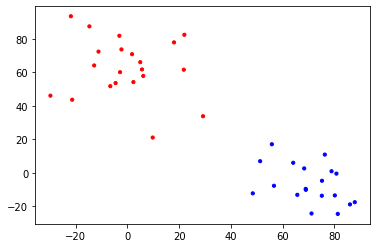

In [17]:
n = 40
data = sklearn_datasets.make_biclusters(shape=(n, 2), n_clusters=2, noise=15.0, random_state=SEED)
X = data[0]
y = data[1][0].astype(int)
colors = ["r" if y_ == 1 else "b" for y_ in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=10)

In [23]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

class SVM(BaseEstimator, ClassifierMixin):
    """ SVM classifier"""
    
    def __init__(self, c, random_state=None):
        super().__init__(c=c,
                         random_state=random_state)
        self._c = c
    
    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)

        # Store the classes seen during fit
        self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y

        # Return the classifier
        return self

    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)

        # Input validation
        X = check_array(X)
        closest = np.argmin(euclidean_distances(X, self.X_), axis=1)
        return self.y_[closest]